# Principal Component Analysis Lab: Hospital Patient Data

## Business Scenario
You've recently joined a healthcare analytics team as a junior data scientist. Your team is working with a hospital network that wants to improve their resource allocation and patient care strategies. The hospital has collected data on patient admissions over the past year, including various health metrics, demographics, and length of stay.

The challenge is that the dataset contains numerous features, making it difficult to visualize patterns and extract meaningful insights. The hospital administrators need to understand the underlying factors that drive variation in patient data to make more informed decisions about resource allocation and patient care protocols.

Your task is to apply Principal Component Analysis (PCA) to this healthcare dataset to reduce its dimensionality while preserving the most important information. By extracting the principal components that explain most of the variance, you'll help the hospital administrators visualize and understand the key factors affecting their patient population.

You'll follow the seven-step PCA process covered in the lesson:
1. Prepare your data
2. Explore feature relationships
3. Implement PCA transformation
4. Analyze variance explained
5. Select optimal components
6. Interpret principal components
7. Visualize and apply transformed data

## Data Overview
The provided file hospital_patients.csv contains simulated patient data with the following features:
- Age
- BMI (Body Mass Index)
- Blood pressure (systolic)
- Blood glucose levels
- Cholesterol levels
- Temperature
- White blood cell count
- Red blood cell count
- Oxygen saturation
- Respiratory rate
- Heart rate
- Length of stay (days)

## Step 0: Load imports and Data

First, load the dataset and get familiar with its structure.

In [28]:
# CodeGrade step0
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


# Load the patient data
patients_df = pd.read_csv('hospital patients.csv')

In [29]:
# Run this cell without changes
# Display the first few rows and basic information
print(patients_df.head())
print("\nDataset Info:")
print(patients_df.info())
print("\nSummary Statistics:")
print(patients_df.describe())

   age        bmi  blood_pressure  glucose  cholesterol  temperature  \
0   76  29.005247             145      161          173        105.3   
1   49  38.070054             125      133          275        101.1   
2   55  22.497515             131      244          145         96.9   
3   49  23.736428             135       90          133        100.0   
4   34  37.951574             114      189          201         97.1   

   white_blood_cells  red_blood_cells  oxygen_saturation  respiratory_rate  \
0              14184             6.56                 98                15   
1               6804             6.75                 85                20   
2               8454             4.95                 91                17   
3              13120             4.42                 95                30   
4               8706             4.37                 98                34   

   heart_rate  length_of_stay  
0         128               8  
1         139               7  
2 

## Step 1: Prepare Data

Now, preprocess and standardize the data:

In [30]:
# CodeGrade step1
# Select features for PCA (exclude length_of_stay as it's a target variable)
# List of column names for features
features = [col for col in patients_df.columns if col != 'length_of_stay']

# Create a feature df X
X = patients_df[features]

# Standardize the features (critical for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Step 2: Explore Feature Relationships
Before applying PCA, it's important to understand the relationships between features.

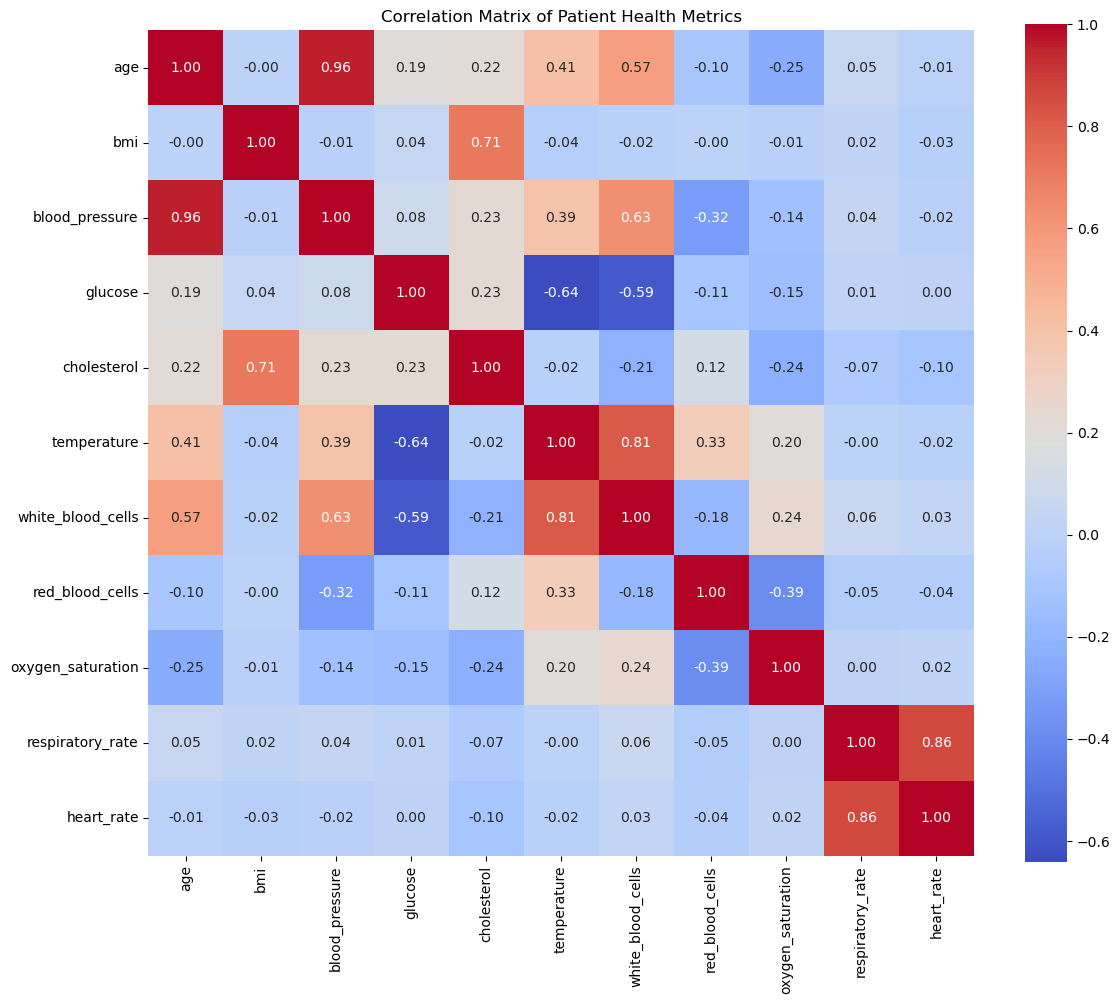

<Figure size 1200x1000 with 0 Axes>

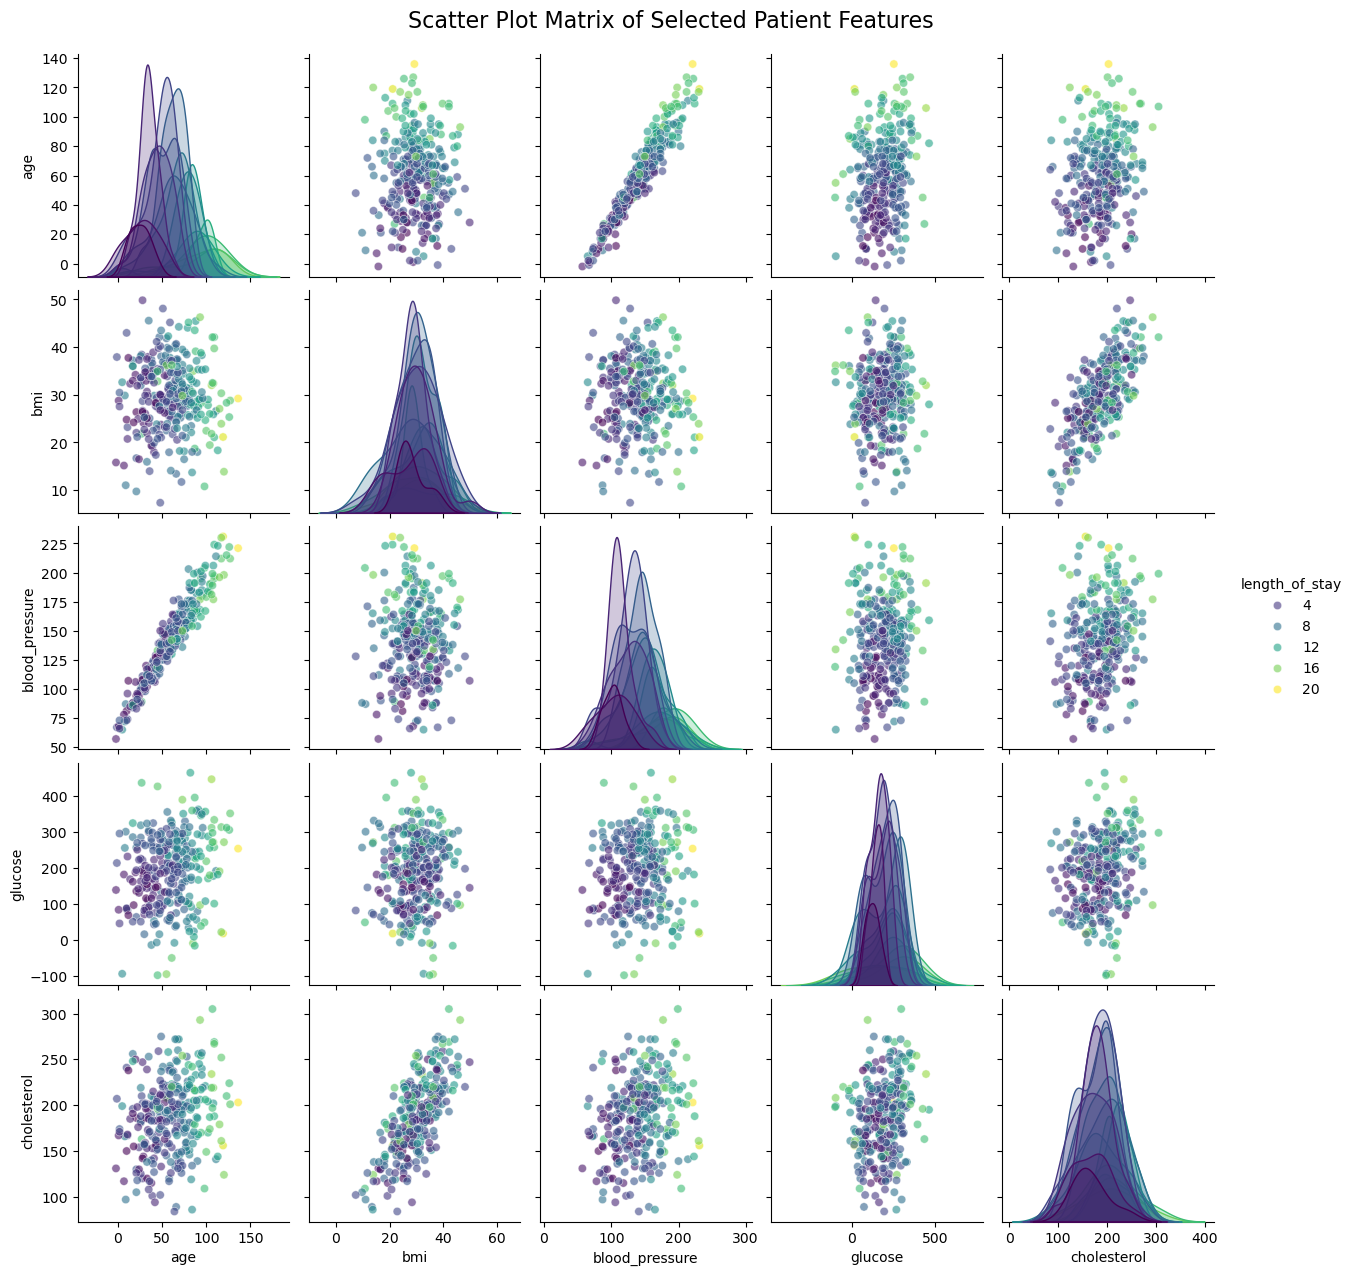

In [31]:
# CodeGrade step2
# Calculate and visualize the correlation matrix (use pandas) of unscaled data for features
X_std_df = pd.DataFrame(X_std, columns=features)
corr_matrix = X_std_df.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Patient Health Metrics')
plt.tight_layout()
plt.show()

# Create scatter plot matrix (pairplot) of unscaled feature data
plt.figure(figsize=(12, 10))
pair = sns.pairplot(patients_df, vars=features[:5], hue='length_of_stay', 
             palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Scatter Plot Matrix of Selected Patient Features', y=1.02, fontsize=16)
plt.show()

## Step 3: Implement PCA Transformation
Now apply PCA to transform the data to the principal component space.

In [32]:
# CodeGrade step3
# Initialize PCA without restricting the number of components
pca = PCA()

# Fit PCA model to scaled data
pca.fit(X_std)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Transform the standardized data to get principal components
X_pca = pca.transform(X_std)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)
pca_df['length_of_stay'] = patients_df['length_of_stay']

# Calculate cumulative explained variance using numpy
cumulative_variance = np.cumsum(explained_variance_ratio)

In [33]:
# Run this cell without changes
# Print explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} of variance explained")
print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {cum_var:.4f}")

Principal Component 1: 0.2751 of variance explained
Principal Component 2: 0.1980 of variance explained
Principal Component 3: 0.1718 of variance explained
Principal Component 4: 0.1421 of variance explained
Principal Component 5: 0.1228 of variance explained
Principal Component 6: 0.0531 of variance explained
Principal Component 7: 0.0238 of variance explained
Principal Component 8: 0.0122 of variance explained
Principal Component 9: 0.0013 of variance explained
Principal Component 10: 0.0000 of variance explained
Principal Component 11: 0.0000 of variance explained

Cumulative explained variance:
First 1 components: 0.2751
First 2 components: 0.4730
First 3 components: 0.6448
First 4 components: 0.7869
First 5 components: 0.9097
First 6 components: 0.9628
First 7 components: 0.9865
First 8 components: 0.9987
First 9 components: 1.0000
First 10 components: 1.0000
First 11 components: 1.0000


## Step 4: Analyze Variance Explained
Create visualizations to help determine the optimal number of components to retain.

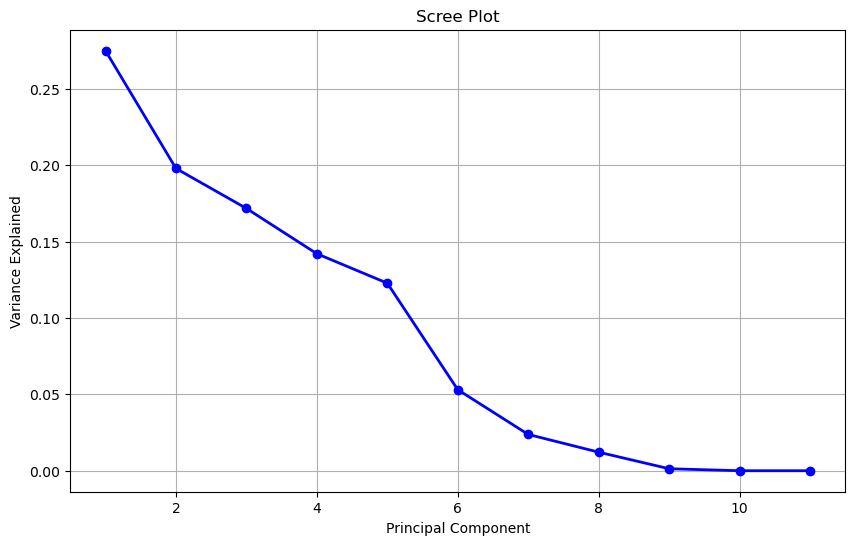

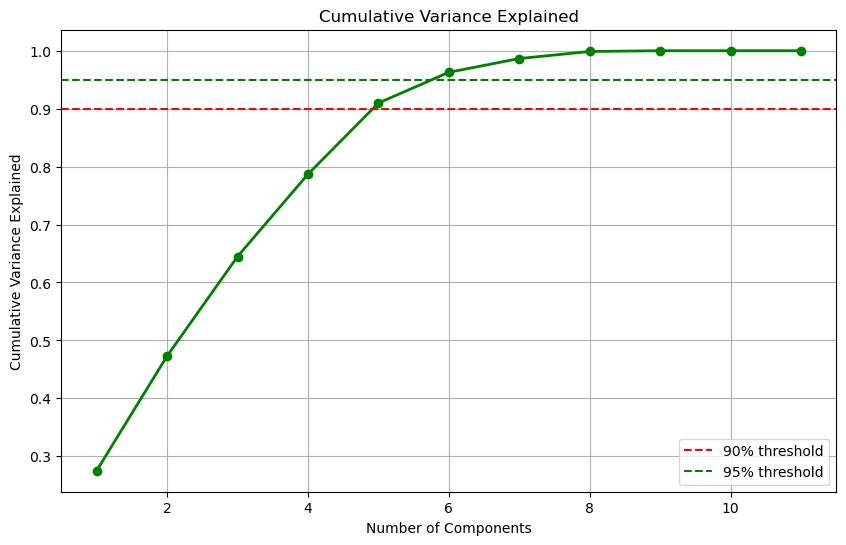

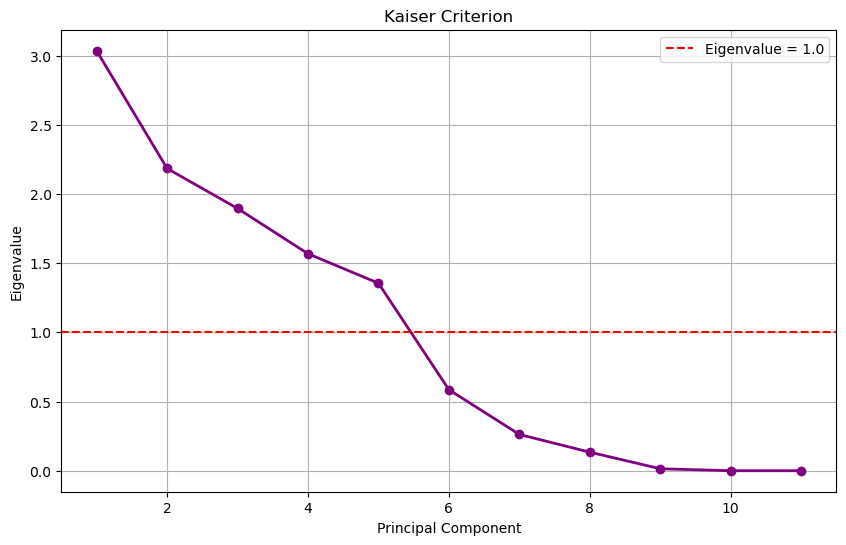

In [34]:
# Scree Plot – variance explained by each principal component
plt.figure(figsize=(10, 6))
scree_plot = plt.plot(range(1, len(explained_variance_ratio) + 1), 
                      explained_variance_ratio, 
                      'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Cumulative Variance Plot – running total of variance explained
plt.figure(figsize=(10, 6))
cum_var_plot = plt.plot(range(1, len(cumulative_variance) + 1), 
                        cumulative_variance, 
                        'o-', linewidth=2, color='green')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Kaiser Criterion Plot – shows eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 6))
kaiser_plot = plt.plot(range(1, len(eigenvalues) + 1), 
                       eigenvalues, 
                       'o-', linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Eigenvalue = 1.0')
plt.title('Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Select Optimal Components and Transform Data
Based on your analysis of variance, select the optimal number of components and transform the data.

In [35]:
# CodeGrade step5
# Determine optimal number of components using different methods

# Based on cumulative variance threshold (e.g., 95%)
target_variance = 0.95
n_components_variance =  np.argmax(cumulative_variance >= target_variance) + 1 

# Based on Kaiser criterion
n_components_kaiser = np.sum(eigenvalues > 1.0)

# Choose the optimal number of components based on variance explained threshold
n_components_optimal = n_components_variance

# Create a new PCA model with the optimal number of components
pca_optimal = PCA(n_components=n_components_optimal)

# Transform standarized data using pca_optimal
X_pca_optimal = pca_optimal.fit_transform(X_std)


In [36]:
# Run this cell without changes
print(f"Components needed for {target_variance*100}% variance: {n_components_variance}")
print(f"Components with eigenvalues > 1: {n_components_kaiser}")
print(f"Selected {n_components_optimal} components based on analysis")

# Display dimensionality reduction statistics
print(f"Original data dimensionality: {X.shape[1]}")
print(f"Reduced data dimensionality: {X_pca_optimal.shape[1]}")
print(f"Dimensionality reduction: {X.shape[1]} → {X_pca_optimal.shape[1]}")

Components needed for 95.0% variance: 6
Components with eigenvalues > 1: 5
Selected 6 components based on analysis
Original data dimensionality: 11
Reduced data dimensionality: 6
Dimensionality reduction: 11 → 6


## Step 6: Interpret Principal Components
Analyze what each principal component represents in terms of the original features.

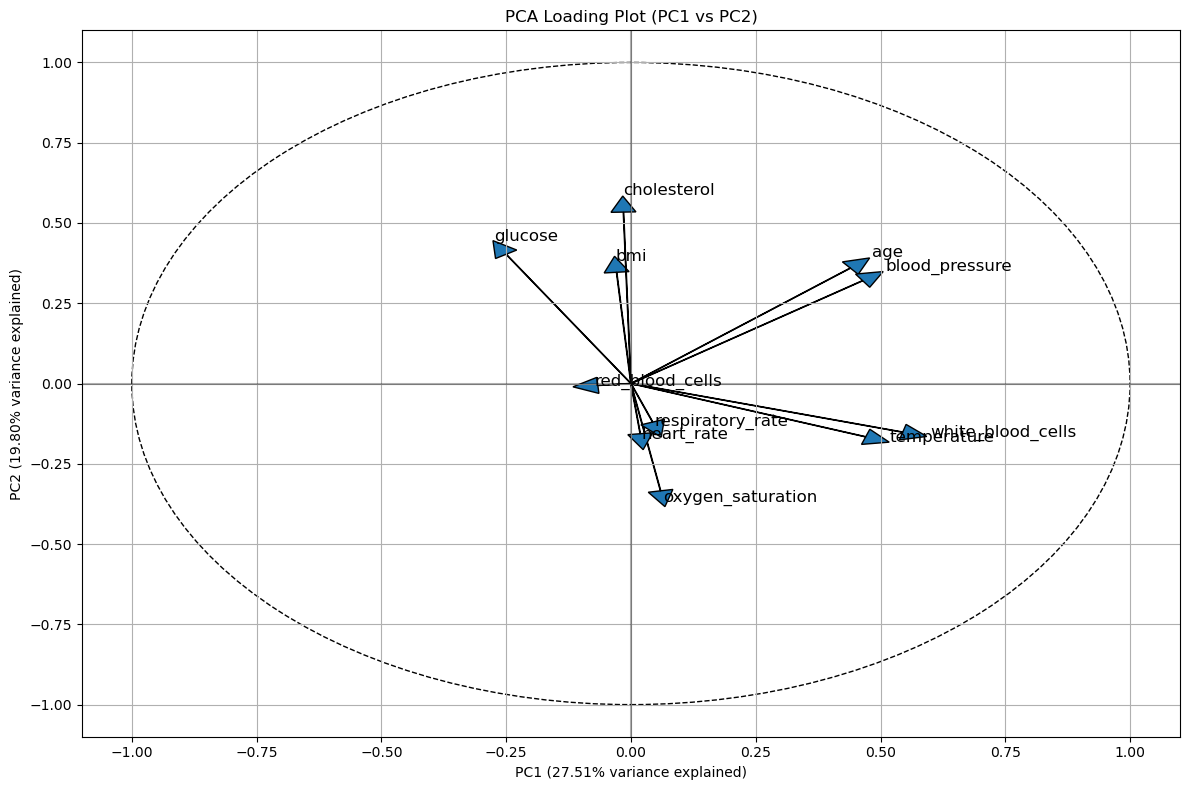

In [37]:
# CodeGrade step6
# Create a DataFrame to display loadings
loadings = pd.DataFrame(
    pca_optimal.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)],
    index=features
)

# Visualize the loadings for the first two PCs
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i, 0]*1.1, loadings.iloc[i, 1]*1.1, feature, fontsize=12)

# Add a unit circle for reference
circle = plt.Circle((0, 0), 1, fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('PCA Loading Plot (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.2%} variance explained)')
plt.tight_layout()
plt.show()

# Identify most important features for each component
# A feature is considered important if its absolute loading is above a threshold
threshold = 0.3  # Common threshold for significance

# Find important features for each component
important_features = {}
for i in range(n_components_optimal):
    # Get the absolute loadings for this component
    abs_loadings = abs(loadings.iloc[:, i])
    # Get indices of features with loadings above threshold
    important_indices = np.where(abs_loadings > threshold)[0]
    # Get the feature names and their loadings
    imp_features = [(features[j], loadings.iloc[j, i]) for j in important_indices]
    # Sort by absolute loading value (descending)
    imp_features = sorted(imp_features, key=lambda x: abs(x[1]), reverse=True)
    important_features[i] = imp_features

In [38]:
# Run this cell without changes
print("Component loadings (weights of original features in each PC):")
print(loadings)

# Interpret the first 3 components (or fewer if you chose fewer components)
for i in range(min(3, n_components_optimal)):
    print(f"\nPrincipal Component {i+1} interpretation:")
    print(f"Explained variance: {pca_optimal.explained_variance_ratio_[i]:.2%}")
    print("Important features and their loadings:")
    for feature, loading in important_features[i]:
        print(f"  {feature}: {loading:.4f}")
    
    # Interpretation example
    if i == 0:
        print("This component appears to represent: Overall health status and severity")
    elif i == 1:
        print("This component appears to represent: Metabolic factors (glucose, cholesterol)")
    else:
        print("This component appears to represent: Inflammatory response")

Component loadings (weights of original features in each PC):
                        PC1       PC2       PC3       PC4       PC5       PC6
age                0.439495  0.359477  0.111790 -0.143932 -0.210311  0.141487
bmi               -0.028705  0.346465 -0.020498  0.361239  0.567299 -0.132788
blood_pressure     0.464179  0.320321  0.117695 -0.228458 -0.074643 -0.032791
glucose           -0.250047  0.402541  0.212765 -0.318295 -0.129034  0.532879
cholesterol       -0.014998  0.533915 -0.036923  0.317803  0.294003  0.071452
temperature        0.470255 -0.165964 -0.180633  0.310180 -0.014180  0.292046
white_blood_cells  0.544523 -0.151420 -0.035740 -0.005660  0.108234 -0.116587
red_blood_cells   -0.066365 -0.005871 -0.201168  0.585159 -0.438295  0.426826
oxygen_saturation  0.059343 -0.334179 -0.020858 -0.225591  0.566651  0.624921
respiratory_rate   0.043517 -0.120060  0.655340  0.232095  0.012921  0.012184
heart_rate         0.018574 -0.156308  0.649861  0.225548 -0.001968  0.021668

P

## Step 7: Visualize and Apply Transformed Data
Visualize the data in the reduced-dimensional space and interpret the results.

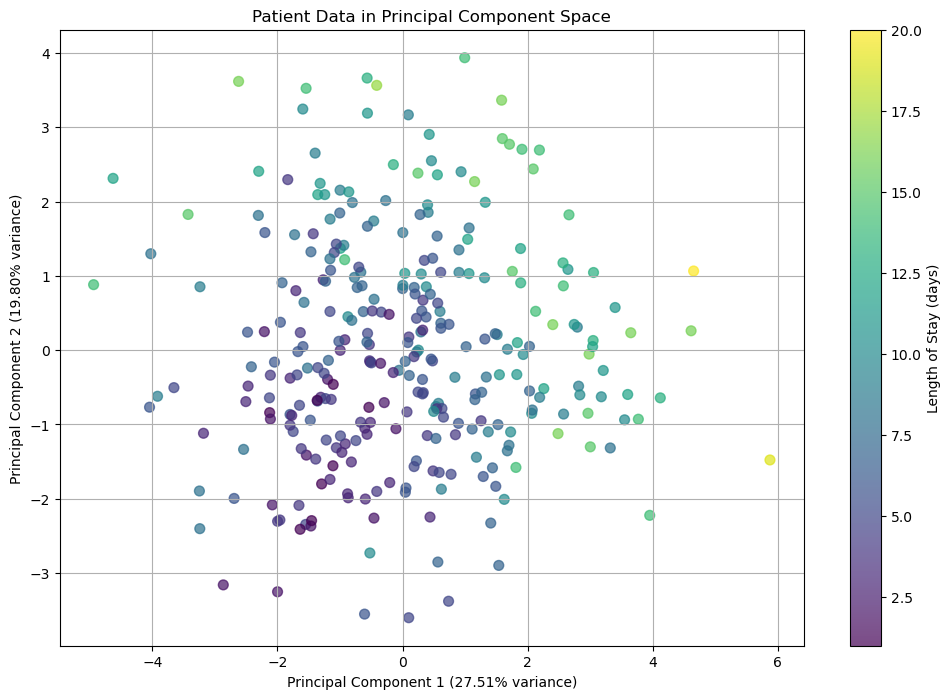

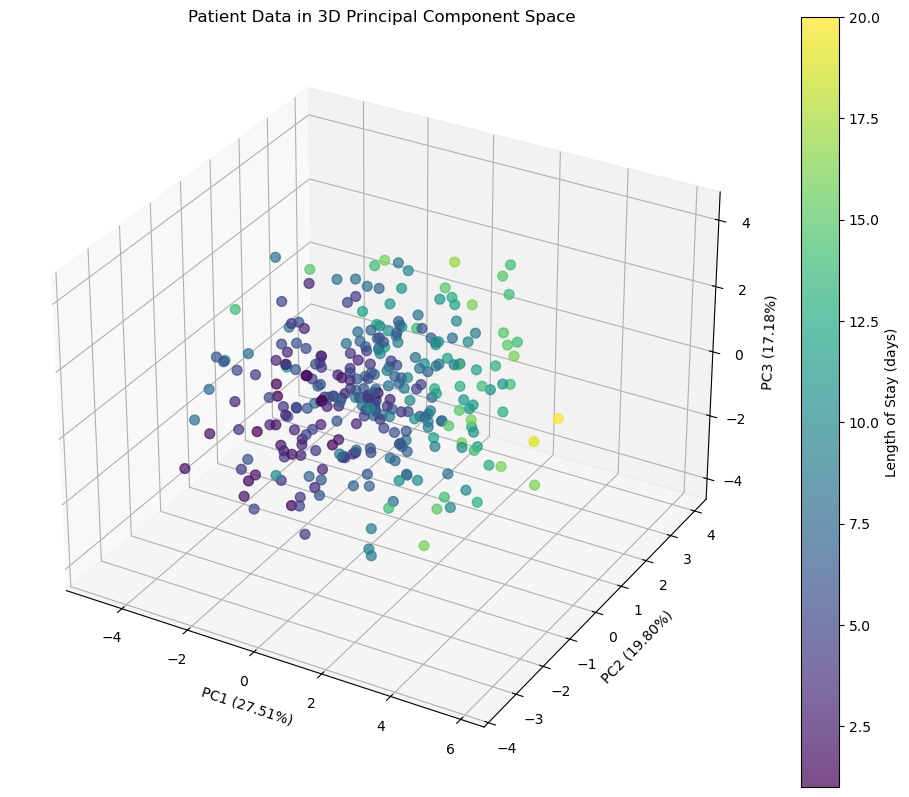

Mean squared reconstruction error: 0.0372


In [39]:
# CodeGrade step7
# Extract the first two principal component features from X_pca_optimal
comp_1 = X_pca_optimal[:, 0]
comp_2 = X_pca_optimal[:, 1]

# Create a scatter plot of the first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    comp_1,
    comp_2,
    c=patients_df['length_of_stay'],
    cmap='viridis',
    alpha=0.7,
    s=50
)

plt.title('Patient Data in Principal Component Space')
plt.xlabel(f'Principal Component 1 ({pca_optimal.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca_optimal.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.colorbar(scatter, label='Length of Stay (days)')
plt.show()

# If you have 3+ components, create a 3D scatter plot
if n_components_optimal >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    sc = ax.scatter(
        X_pca_optimal[:, 0],
        X_pca_optimal[:, 1],
        X_pca_optimal[:, 2],
        c=patients_df['length_of_stay'],
        cmap='viridis',
        alpha=0.7,
        s=50
    )
    
    ax.set_title('Patient Data in 3D Principal Component Space')
    ax.set_xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.2%})')
    ax.set_ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.2%})')
    ax.set_zlabel(f'PC3 ({pca_optimal.explained_variance_ratio_[2]:.2%})')
    fig.colorbar(sc, ax=ax, label='Length of Stay (days)')
    plt.show()

# Reconstruct the original data from the PCA representation
X_reconstructed = pca_optimal.inverse_transform(X_pca_optimal)

# Calculate mean squared error between original and reconstructed data
reconstruction_error = mean_squared_error(X_std, X_reconstructed)
print(f"Mean squared reconstruction error: {reconstruction_error:.4f}")